University of Michigan - ROB 101 Computational Linear Algebra

# Lab 4: Introduction to Functions

## Why functions?

- Functions are efficient: Previously, we used commands to do calculations. When the calculation gets more and more complex, it needs more and more lines of commands. In applications, the same calculation usually needs to be done many times for different numbers.

### Example 1. If Statements

Julia provides a variety of control flow constructs. Control flow regulates the order of statements to be executed. `if-else` is a common control flow in Julia and other programming languages. The syntax is as follows:
<code>
if **condition**
    **statement1**
else
    **statement2**
end
</code>

In [ ]:
# If the condition is evaluated to be true, execute statement1, otherwise, execute statement2
x = 1
y = 1
if x < y
    println("x is less than y")
else
    println("x is no less than y")
end

More conditions can evaluated using `if-elseif-else` control flow with multiple `elseif` keywords. The syntax is as follows:
<code>
if **condition1**
    **statement1**
elseif **condition2**
    **statement2**
elseif **condition3**
    **statement3**
...
else **conditionN**
    **statementN**
end
</code>

In [ ]:
# More conditions can be evaluated using elseif
x = 1
y = 1
if x < y
    println("x is less than y")
elseif x > y
    println("x is greater than y")
else
    println("x is equal to y")
end

## To play with on your own

A simple `if-else` control flow can also be replaced by a inline `?:` ternary operator for convenience. The syntax is as follows:

<code>**condition** ? **statement1** : **statement2**</code>

In [ ]:
# If the condition is evaluated to be true, execute statement1, otherwise, execute statement2
x = 1
y = 1
x < y ? println("x is less than y") : println("x is no less than y")

## Back to the main material

For more complex conditions, a nested-`if` statement can be used to split the conditions, e.g.:

In [ ]:
# Nested-if control flow
x = 1
y = 1
if x < y
    println("We know x is less than y.")
else
    println("We only know x is no less than y.")
    if x > y
        println("Now we know x is grater then y.")
    else
        println("Now we know x is equal to y.")
    end
end

### Example 2. Introduction to Functions

In Julia, functions can be defined inline or using the `function` keyword, e.g.:

**The `return` Keyword**: The default value returned by a function is the last expression in the body of the function definition. It is GOOD PROGRAMMING PRACTICE to specify what is being returned by the function, `f` 

In [10]:
# Specify a returned value using the return keyword
function f(x)
    x = x+1
    return x
end
# The operations after the return keyword will be omitted
f(1)

2

In [ ]:
# We can also return more than one value

The `return` keyword can be used more than once in a function definition in conjunction with other control flow, e.g.:

In [ ]:
# Define a function returning different value on different conditions
function abs(a)
    if a >= 0
        return a
    else
        return -a
    end
end
# Call the function
abs(-2)

**More about Arguments**

In [ ]:
# Define a function with multiple arguments
function sum(a, b)
   c= a + b
    return c
end
sum(1, 1)

## To read on your own

In [ ]:
# Define a function with optional argument. Here a default vlaue for z is given. 
# If you just include two arguments when you call the function, it will assume z=0
function xyzpos(x, y, z=0)
    println("The robot is at position ($x, $y, $z).")
end
xyzpos(1, 2)

## Back to the lecture: More about Returns

In [11]:
# Define a function with multiple returns
function max(input_vector)
    # initialize the max to the element 
    # then update when we find bigger elements!
    maximum_value = input_vector[1]
    maximum_index = 1
    for i in 1:length(input_vector)
        if input_vector[i] > maximum_value
            maximum_value = input_vector[i]
            maximum_index = i
        end
    end
    return maximum_value, maximum_index
end

a = [0, 1, 5, 3]
maximum_value, maximum_index = max(a)

(5, 3)

## Here is a function that you will want to have. It is based on juliahw????

In [12]:
function forwardsub(L, b)
    # Assert no entries in the diagonal of U
    # are 0 (or very close to 0)
    @assert minimum(abs.(diag(U))) > 1e-6
    # START of our computations
    n = length(b)
    x = Vector{Float64}(undef, n); #initialize an x vector of the correct size
    x[1] = b[1]/L[1,1] #find the first entry of x
    for i = 2:n #find every entry from the 2nd to the end
        x[i]=(b[i]- (L[i,1:i-1])' *x[1:i-1] )./L[i,i] 
        #notice that we used a transpose operator to get the row of L
    end
    # END of our computations. 
    return x
end

forwardsub (generic function with 1 method)

In [ ]:
using Random
L=randn(10,10)
for j

### Example 3. Peeling the Onion

Given a generic square matrix, can we factor it as the product of a lower-triangular matrix and an upper-triangular matrix?

As introduced in the textbook, we can do this by <span style="color:red">**peeling the onion**</span>: **working from the top left corner and working down the diagonal, it successively eliminates columns and rows from a matrix!**

This example will teach you how to use function to solve the problem more easily.

<img align="left" src="https://content.presentermedia.com/content/animsp/00021000/21530/onion_layers_300_wht.gif"/>

In [ ]:
using Random
using LinearAlgebra
Random.seed!(09182021)
A = randn(5, 5)

In [ ]:
function peel_one_layer(Temp, k)
    pivot = Temp[k, k]
    C = Temp[:, k] / pivot
    R = Temp[k:k, :]
    Temp = Temp - C*R
    return C, R, Temp
end

In [ ]:
Temp = copy(A) # Initialize Temp matrix by copying the original matrix A
nRows, nCols = size(Temp) # Get the size of the input matrix

# Initialize the lower and upper triangular matrix
L = zeros(Float64, (nRows, nCols)) # Using zeros function by specifying the type and size
U = zero(Temp) # Or using zero function by providing a 'like' matrix

for k = 1 : nRows
    C, R, Temp = peel_one_layer(Temp, k)
    L[:, k] = C
    U[k:k, :] = R
end

In [ ]:
L

In [ ]:
U

In [ ]:
A - L*U

### Something for Fun

In [7]:
using Dates
using Plots
function plot_current_time()
    th = 0:0.1:2*pi
    X = cos.(th)
    Y = sin.(th)
    plt = plot(X, Y, aspect_ratio=1, axis=nothing, framestyle=:origin, legend=false)
    add_numbers(plt)
    t = Dates.now()
    @show t
    th_h = -(Dates.hour(t) % 12 / 12 * 2*pi - pi/2)
    plot!(plt, [0, 0.6*cos(th_h)], [0, 0.6*sin(th_h)], arrow=true)
    th_m = -(Dates.minute(t) / 60 * 2*pi - pi/2)
    plot!(plt, [0, 0.8*cos(th_m)], [0, 0.8*sin(th_m)], arrow=true)
    th_s = -(Dates.second(t) / 60 * 2*pi - pi/2)
    plot!(plt, [0, cos(th_s)], [0, sin(th_s)], arrow=true)
end

plot_current_time (generic function with 1 method)

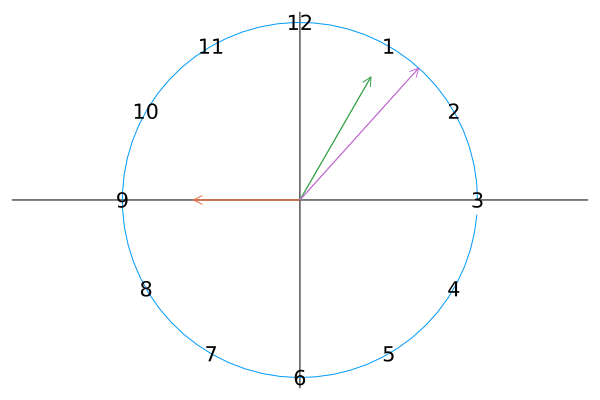

In [6]:
plot_current_time()

In [8]:
function add_numbers(plt)
    for n = 1:12
        theta = -(n / 12 * 2*pi - pi/2)
        annotate!(cos(theta), sin(theta), n)
    end
end

add_numbers (generic function with 1 method)

t = DateTime("2021-09-20T21:06:00.923")
t = DateTime("2021-09-20T21:06:01.004")
t = DateTime("2021-09-20T21:06:01.023")
t = DateTime("2021-09-20T21:06:01.041")
t = DateTime("2021-09-20T21:06:01.059")
t = DateTime("2021-09-20T21:06:01.077")
t = DateTime("2021-09-20T21:06:01.096")
t = DateTime("2021-09-20T21:06:01.113")
t = DateTime("2021-09-20T21:06:01.131")
t = DateTime("2021-09-20T21:06:01.149")
t = DateTime("2021-09-20T21:06:01.167")
t = DateTime("2021-09-20T21:06:01.186")
t = DateTime("2021-09-20T21:06:01.205")
t = DateTime("2021-09-20T21:06:01.223")
t = DateTime("2021-09-20T21:06:01.241")
t = DateTime("2021-09-20T21:06:01.259")
t = DateTime("2021-09-20T21:06:01.277")
t = DateTime("2021-09-20T21:06:01.294")
t = DateTime("2021-09-20T21:06:01.313")
t = DateTime("2021-09-20T21:06:01.331")
t = DateTime("2021-09-20T21:06:01.350")
t = DateTime("2021-09-20T21:06:01.368")
t = DateTime("2021-09-20T21:06:01.386")
t = DateTime("2021-09-20T21:06:01.404")
t = DateTime("2021-09-20T21:06:01.422")


┌ Info: Saved animation to 
│   fn = /home/jovyan/clock.gif
└ @ Plots /opt/julia/packages/Plots/Di0Qb/src/animation.jl:114


Plots.AnimatedGif("/home/jovyan/clock.gif")
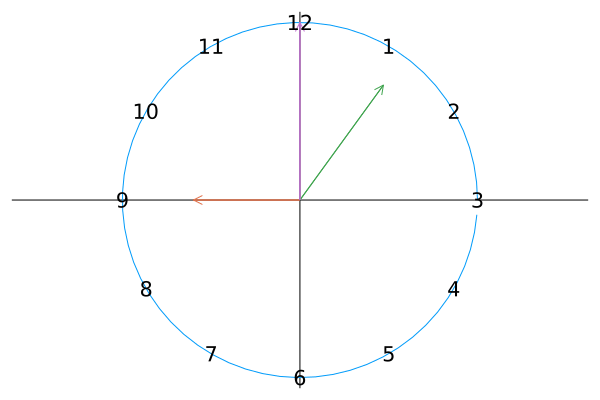

In [9]:
anim = @animate for i in 1:500
    plot_current_time()
end
gif(anim, "clock.gif", fps=15)